In [135]:
import pandas as pd
import matplotlib.pyplot as plt

In [136]:
path = r"C:\Users\Lodewijk\Desktop\scriptie\GNN-document-classification\results\quick_test\results.csv"

In [137]:
df = pd.read_csv(path, names=["model_name","train","test","acc"])
df

,model_name,train,test,acc
0,Vanilla 1 Layer GCN,40,80,0.625000
1,Vanilla 1 Layer GCN,40,160,0.631250
2,Vanilla 1 Layer GCN,40,320,0.621875
3,Vanilla 1 Layer GCN,40,640,0.598437
4,Vanilla 1 Layer GCN,40,2560,0.337500
...,...,...,...,...
171,2 Layer 4 Heads Concat GatGCN,1280,160,0.787500
172,2 Layer 4 Heads Concat GatGCN,1280,320,0.759375
173,2 Layer 4 Heads Concat GatGCN,1280,640,0.765625
174,2 Layer 2 Heads Concat GatGCN,40,80,0.412500


In [138]:
models = df["model_name"].unique()
train_sizes = df["train"].unique()
test_sizes = df["test"].unique()
models

array(['Vanilla 1 Layer GCN', 'Vanilla 2 Layer GCN',
       'Vanilla 4 Layer GCN', '1 hop SimpleGCN', '3 hop SimpleGCN',
       '2 Layer 4 Heads Concat GatGCN', '2 Layer 2 Heads Concat GatGCN'],
      dtype=object)

In [139]:
colors = ["lightgreen", "green", "black", "lightblue", "darkblue", "pink", "red", "darkred"]
color_mapping = {model : colors[i] for i, model in enumerate(models)}

xs = [1, 1.5, 2, 3, 3.5, 4.5, 5, 5.5]
x_mapping = {model : xs[i] for i, model in enumerate(models)}

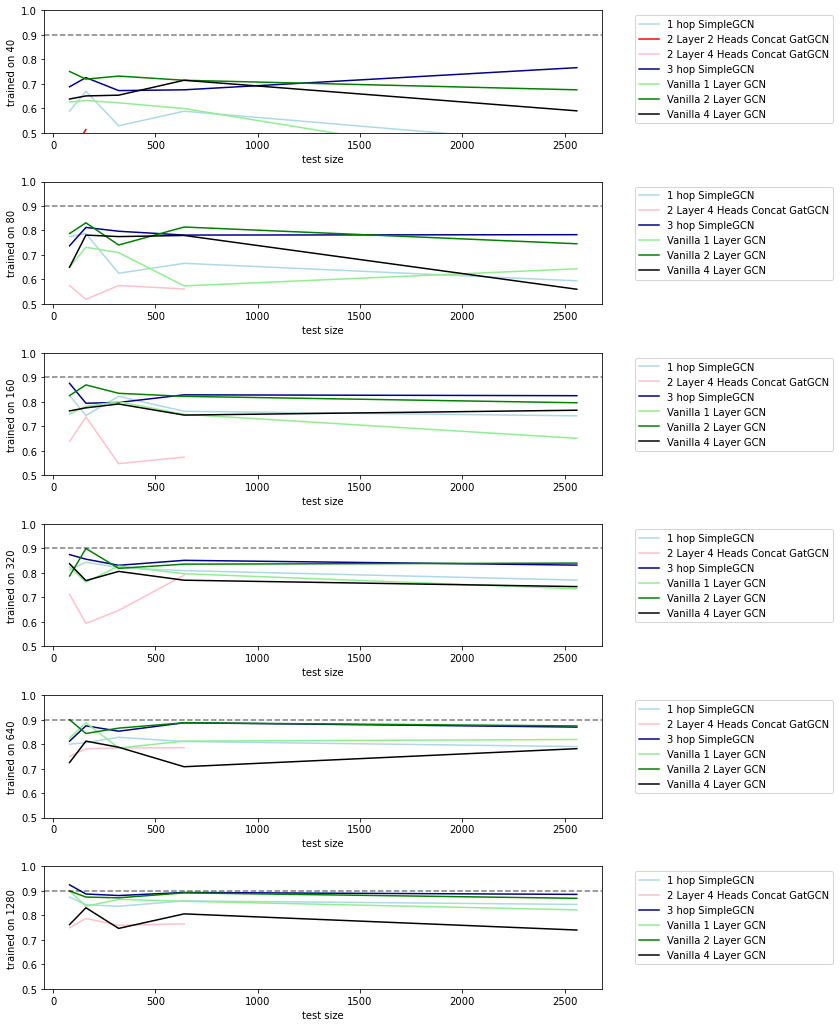

In [141]:
model_count = len(models)

train_size = 40
test_size = 160


fig, axes = plt.subplots(len(train_sizes), 1, figsize=(10, 18))

for i, train_size in enumerate(train_sizes):
    ax = axes[i]
    sub_df = df[(df["train"]==train_size)]

    for model, sub_sub_df in sub_df.groupby("model_name"):
        ax.plot(sub_sub_df["test"], sub_sub_df["acc"], label=model, color=color_mapping[model])
        
    ax.set_ylim(0.5, 1)
    ax.axhline(0.9, color="black", ls="--", alpha=0.5)
    ax.set_ylabel("trained on %d" % train_size)
    ax.set_xlabel("test size")
    
    ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
plt.subplots_adjust(hspace=0.4)
plt.show()